# Modulations sous Python

   [LTP Charles Carnus](https://www.carnus.fr/) - K. Boudjelaba



---

### Table des matières :

* <a href="#MA">Modulations analogiques</a>
* <a href="#MN">Modulations numériques</a>

---

Pour plus de détails, cliquer sur ce lien : [MatPlotLib](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html)

<div class="alert alert-block alert-warning"> 
<b>Remarque :</b> Programmes Python dans Jupyter Notebook.   
</div>

---

<a id="MA"></a>
## Modulations analogiques

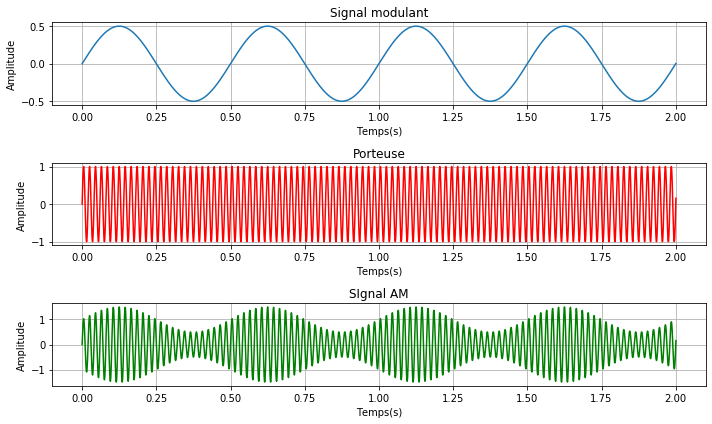

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fe = 2e3 # Fréquence d'échantillonnage
t = np.arange(0,2+(1/fe),1/fe)

# Porteuse
fp = 50
Ap = 1
p = Ap*np.sin(2*np.pi*fp*t)

# Message
fm = 2
Am = 0.5
m = Am*np.sin(2*np.pi*fm*t)

# Modulation
s = p*(1+m/Ap)

plt.figure(figsize=(10,6))
plt.subplot(311)
plt.plot(t,m)
plt.title('Signal modulant')
plt.xlabel('Temps(s)')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(312)
plt.plot(t,p,'r')
plt.title('Porteuse')
plt.xlabel('Temps(s)')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(313)
plt.plot(t,s,'g');plt.title('SIgnal AM')
plt.xlabel('Temps(s)')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()

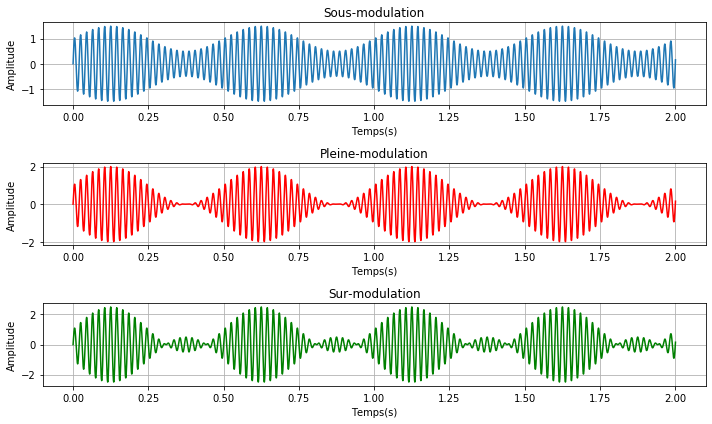

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fe = 2e3 # Fréquence d'échantillonnage
t = np.arange(0,2+(1/fe),1/fe)

# Porteuse
fp = 50
Ap = 1
p = Ap*np.sin(2*np.pi*fp*t)

# Message
fm = 2
Am = 0.5
m = Am*np.sin(2*np.pi*fm*t)

# Modulation
# Sous modulation
s = p*(1+m/Ap)

plt.figure(figsize=(10,6))
plt.subplot(311)
plt.plot(t,s)
plt.title('Sous-modulation')
plt.xlabel('Temps(s)')
plt.ylabel('Amplitude')
plt.grid()

# Pleine modulation
Am = 1
m = Am*np.sin(2*np.pi*fm*t)
s = p*(1+m/Ap)

plt.subplot(312)
plt.plot(t,s,'r')
plt.title('Pleine-modulation')
plt.xlabel('Temps(s)')
plt.ylabel('Amplitude')
plt.grid()

# Sur modulation
Am = 1.5
m = Am*np.sin(2*np.pi*fm*t)
s = p*(1+m/Ap)

plt.subplot(313)
plt.plot(t,s,'g')
plt.title('Sur-modulation')
plt.xlabel('Temps(s)')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()

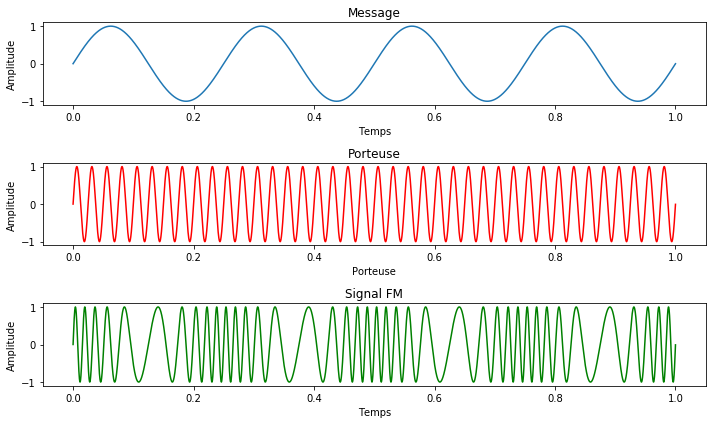

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Mf = 4.0
Cf = 40.0
m = 1.0

t = np.arange(44100.0) / 44100.0
Ms = m * np.sin(2.0 * np.pi * Mf * t)
Cs = np.sin(2.0 * np.pi * Cf * t)
FMs = np.zeros_like(Ms)

for i, t1 in enumerate(t):
    FMs[i] = np.sin(2. * np.pi * (Cf * t1 + Ms[i]))

plt.figure(figsize=(10,6))
plt.subplot(3, 1, 1)
plt.plot(t,Ms)
plt.title('Message')
plt.ylabel('Amplitude')
plt.xlabel('Temps')

plt.subplot(3, 1, 2)
plt.plot(t,Cs,'r')
plt.title('Porteuse')
plt.ylabel('Amplitude')
plt.xlabel('Porteuse')

plt.subplot(3, 1, 3)
plt.plot(t,FMs,'g')
plt.title('Signal FM')
plt.ylabel('Amplitude')
plt.xlabel('Temps')

plt.tight_layout()
plt.show()

---

<a id="MN"></a>
## Modulations numériques

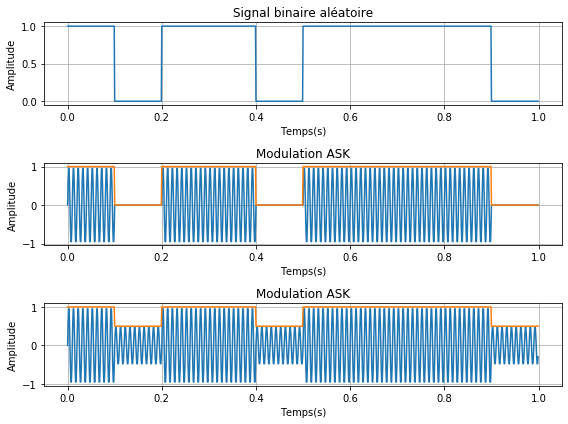

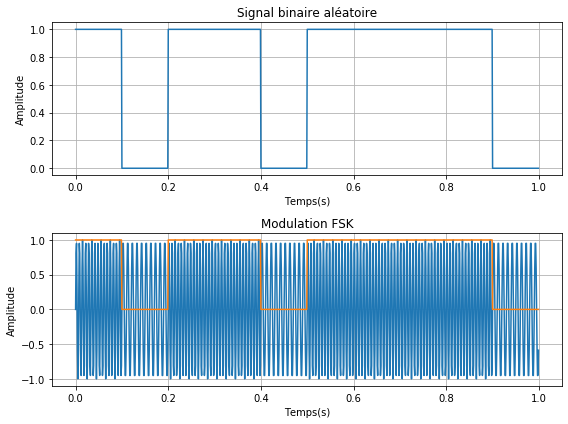

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Porteuse
fe = 1000
fp = 100
duree = 1
t = np.arange(0,duree,1/fe)
p = np.sin(2*np.pi*fp*t)

#Séquence binaire aléatoire
Td = 0.1
ech = int(Td*fe)
sym = int(np.floor(np.size(t)/ech))

def binaire(symbole,Tsym):
    rand_n = np.random.rand(symbole)
    rand_n[np.where(rand_n>=0.5)] = 1
    rand_n[np.where(rand_n<0.5)] = 0  
    s = np.zeros(int(symbole*Tsym))
    id_1 = np.where(rand_n == 1)
    
    for i in id_1[0]:
        temp = int(i*Tsym)
        s[temp:temp+Tsym] = 1
        
    return s

s = binaire(sym, ech)

# ASK

plt.figure(figsize=(8,6))
plt.subplot(311)
plt.plot(t,s)
plt.xlabel('Temps(s)')
plt.ylabel('Amplitude')
plt.title('Signal binaire aléatoire')
plt.grid()

ask = p*s
plt.subplot(312)
plt.plot(t,ask)
plt.plot(t,s)
plt.xlabel('Temps(s)')
plt.ylabel('Amplitude')
plt.title('Modulation ASK')
plt.grid()
plt.tight_layout()

ask2=[]
s2=[]
ask2=np.zeros(np.size(s))
s2=np.zeros(np.size(s))
for ele in range(np.size(s)):
    if s[ele]==0:
        ask2[ele]=p[ele]*(s[ele]+0.5)
        s2[ele]=s[ele]+0.5
    else:
        ask2[ele]=p[ele]*s[ele]
        s2[ele]=s[ele]
        
plt.subplot(313)
plt.plot(t,ask2)
plt.plot(t,s2)
plt.xlabel('Temps(s)')
plt.ylabel('Amplitude')
plt.title('Modulation ASK')
plt.grid()
plt.tight_layout()

# FSK

plt.figure(figsize=(8,6))
plt.subplot(211)
plt.plot(t,s)
plt.xlabel('Temps(s)')
plt.ylabel('Amplitude')
plt.title('Signal binaire aléatoire')
plt.grid()

f = fp+fp*s/2
fsk = np.sin(2*np.pi*f*t)
plt.subplot(212)
plt.plot(t,fsk)
plt.plot(t,s)
plt.xlabel('Temps(s)')
plt.ylabel('Amplitude')
plt.title('Modulation FSK')
plt.grid()
plt.tight_layout()